#  My MCMC Simulation


In [209]:
########################libraries ################
import numpy as np
import pymc3 as pm
import math
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sys
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import os



In [239]:
#loading the df
all_peptide_df=pd.read_csv("C:/Users/Elinor/Desktop/תואר שני/thesis_codes/Random_wallk_files/10001_peptide_df.csv")
all_peptide_df.drop(columns="Unnamed: 0",inplace=True)
all_peptide_df["median"]=all_peptide_df.iloc[:,1:27].median(axis=1)
all_peptide_df["total_binders"]=all_peptide_df["SB"]+all_peptide_df["WB"]
all_peptide_df["total_super_binders"]=all_peptide_df["sb_supertypes"]+all_peptide_df["wb_supertypes"]




In [230]:
all_peptide_df.columns

Index(['Peptide', 'HLA-A*3301', 'HLA-B*5801', 'HLA-A*0201', 'HLA-B*3501',
       'HLA-A*3002', 'HLA-A*0206', 'HLA-A*2601', 'HLA-B*4001', 'HLA-A*0203',
       'HLA-B*0801', 'HLA-A*1101', 'HLA-A*6802', 'HLA-B*1501', 'HLA-A*3001',
       'HLA-A*3201', 'HLA-B*4403', 'HLA-A*6801', 'HLA-A*2402', 'HLA-A*3101',
       'HLA-B*5301', 'HLA-B*5701', 'HLA-B*0702', 'HLA-A*0301', 'HLA-A*2301',
       'HLA-A*0101', 'HLA-B*4402', 'HLA-B*5101', 'average', 'min_rank',
       'av_of_total_binders', 'NB', 'SB', 'WB', 'nb_supertypes',
       'sb_supertypes', 'wb_supertypes', 'sb_super_type_id',
       'wb_super_type_id', 'median', 'total_binders', 'total_super_binders'],
      dtype='object')

In [206]:
random.seed(43)
print(random.random())

0.038551839337380045


In [244]:
#################################################### Params ###########################
params={}
params["probability_function"]=lambda x :1.0/(1+math.exp(x) +0.1) #arbitrary probability function 
params["seed"]=random.seed(42)
params["write_output"]=True
#output folder
params["main_output_folder"] = "C:/Users/Elinor/Desktop/תואר שני/simultation outputs/"


In [237]:
########################## functions ###############################################
def simulation(df,function,col_contains_data):
    """gets df,function, and the column that contains the data with the score im intrsted to check ,
    insert the data of each row into the column and return optimization graph"""
    probabilty_res_MCMC=[]
    all_data_prob=[] #for comparing between the normal and the MCMC
    delta=df[str(col_contains_data)].diff() #Calculating the delta between two values in the columns
    delta.dropna(inplace=True) #deliting the first row from the df because of the first delta in None
    df=df.drop([0])
    for score in delta:
        prob_res=params["probability_function"](score)
        params["seed"]
        #print(prob_res)
        random_toss=random.random()
        all_data_prob.append(prob_res)
        if random_toss<=prob_res:
            probabilty_res_MCMC.append("True") #true if the results are under the probability calculated    
        elif random_toss>prob_res :
            probabilty_res_MCMC.append("False")
    df["probabilty_res_MCMC"]=probabilty_res_MCMC
    df["all_data_prob"] =all_data_prob 
    df["delta"]=delta 
    return df 



In [142]:

def create_folder(main_folder_path,new_folder_name):
    """creates new folder if it doesn't alreadt exists"""
    dirName =new_folder_name
    if not os.path.exists(main_folder_path+dirName):
        os.chdir(main_folder_path) # enable to add sub folder to the main folder 
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ")
        return  main_folder_path + new_folder_name+"/"
    else:    
        print("Directory " , dirName ,  " already exists")


In [309]:
#df.loc[df["delta"]df['probabilty_res_MCMC'] == "True")]
#len(df.loc[df['probabilty_res_MCMC'] == "True"].index[0:5])
#[i for i in range(len(df.loc[df['probabilty_res_MCMC'] == "True"]))]

In [74]:
# def delta_graph(df,MCMC_probabilities,all_probabilities):
#     """gets the relevant columns and rturns their delta graph as function of the probabilities calaulated"""
#     #fig, axs = plt.subplots(2,sharex=False)
#     fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
#     #fig, (ax1, ax2).subtitle('delta of MCMC')
#     #plt.figure(figsize=(10,10))

#     # Remove horizontal space between axes
#     fig.subplots_adjust(hspace=1)

#     # Plot each graph, and manually set the y tick values
#     #ax1.plot([i for i in range(len(df.loc[df['probabilty_res_MCMC'] == "True"]))], df["delta"][df['probabilty_res_MCMC'] == "True"])
#     ax1.plot(df.loc[df['probabilty_res_MCMC'] == "True"].index, df["delta"][df['probabilty_res_MCMC'] == "True"])
#     plt.title("MCMC probabilities")
#     ax1.title.set_text('delta of MCMC')
#     ax1.set(xlabel='peptide ', ylabel='delta of MCMC')

#     ax2.plot(df.index,df["delta"])
#     plt.title("delta of all data")
#     ax2.set(xlabel='peptide ', ylabel='delta of all data')

#     plt.show

#     #return fig, (ax1, ax2)

In [71]:
def total_bindes_graph(df,total_binders):
    """gets the relevant columns and rturns their delta graph as function of the probabilities calaulated"""
    #fig, axs = plt.subplots(2,sharex=False)
    fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
    #fig, (ax1, ax2).subtitle('delta of MCMC')
    #plt.figure(figsize=(10,10))

    # Remove horizontal space between axes
    fig.subplots_adjust(hspace=1)

    # Plot each graph, and manually set the y tick values
    #ax1.scatter([i for i in range(len(df.loc[df['probabilty_res_MCMC'] == "True"]))], df["total_binders"][df['probabilty_res_MCMC'] == "True"]) #if i will be asked to give the peptides as x asix with no regrds to the order
    ax1.scatter(df.loc[df['probabilty_res_MCMC'] == "True"].index, df["total_binders"][df['probabilty_res_MCMC'] == "True"])
    plt.title("MCMC probabilities")
    ax1.title.set_text('total binders MCMC')
    ax1.set(xlabel='peptide ', ylabel='number of binders MCMC')
    #plt.ylabel("MCMC probabilities")
    #axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
    #axs[0].set_ylim(-1, 1)

    ax2.scatter(df.index,df["total_binders"])
    plt.title("all total binders")
    ax2.set(xlabel='peptide ', ylabel='number of binders of all data')
    #plt.ylabel("all probabilities")


    # axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
    # axs[1].set_ylim(0, 1)

    # axs[2].plot(t, s3)
    # axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
    # axs[2].set_ylim(-1, 1)

    plt.show()

In [132]:
def graph_for_intresting_col(df,intresting_col):
    """gets the relevant columns and rturns their graphes and the difference between MCMC and all the data"""
    #fig, axs = plt.subplots(2,sharex=False)
    fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
    #fig, (ax1, ax2).subtitle('delta of MCMC')
    #plt.figure(figsize=(10,10))

    # Remove horizontal space between axes
    fig.subplots_adjust(hspace=1)

    # Plot each graph, and manually set the y tick values
##    ax1.scatter([i for i in range(len(df.loc[df['probabilty_res_MCMC'] == "True"]))], df[str(intresting_col)][d#f##['probabilty_res_MCMC'] == "True"])
    plt.title("MCMC probabilities")
    ax1.scatter(df.loc[df['probabilty_res_MCMC'] == "True"].index, df[str(intresting_col)][df['probabilty_res_MCMC'] == "True"])

    ax1.title.set_text('{} number of binders MCMC'.format(str(intresting_col)))
    ax1.set(xlabel='Peptide ', ylabel='{} number of binders MCMC'.format(str(intresting_col)))
    #plt.ylabel("MCMC probabilities")
    #axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
    #axs[0].set_ylim(-1, 1)

    #ax2.scatter(df.index,df[str(intresting_col)])
    ax2.scatter(df.index,df[str(intresting_col)])
    #df["peptide"]
    plt.title('{} number of all data'.format(str(intresting_col)))
    ax2.set(xlabel='peptide ', ylabel="{} of all data".format(str(intresting_col)))
    #plt.ylabel("all probabilities")


    # axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
    # axs[1].set_ylim(0, 1)

    # axs[2].plot(t, s3)
    # axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
    # axs[2].set_ylim(-1, 1)


In [249]:
#################################################### Analysis ###########################


df=simulation(all_peptide_df,params["probability_function"],"av_of_total_binders")      
df1=simulation(all_peptide_df,params["probability_function"],"min_rank") 
df3=simulation(all_peptide_df,params["probability_function"],"median")  
df4=simulation(all_peptide_df,params["probability_function"],"total_super_binders")
df5=simulation(all_peptide_df,params["probability_function"],"sb_supertypes")
df5=simulation(all_peptide_df,params["probability_function"],"wb_supertypes")
df5=simulation(all_peptide_df,params["probability_function"],"nb_supertypes")
df5=simulation(all_peptide_df,params["probability_function"],"average")
df6=simulation(all_peptide_df,params["probability_function"],"av_of_total_binders")


Directory  min_rank_expirment,seed 123  Created 
C:/Users/Elinor/Desktop/תואר שני/simultation outputs/min_rank_expirment,seed 123/


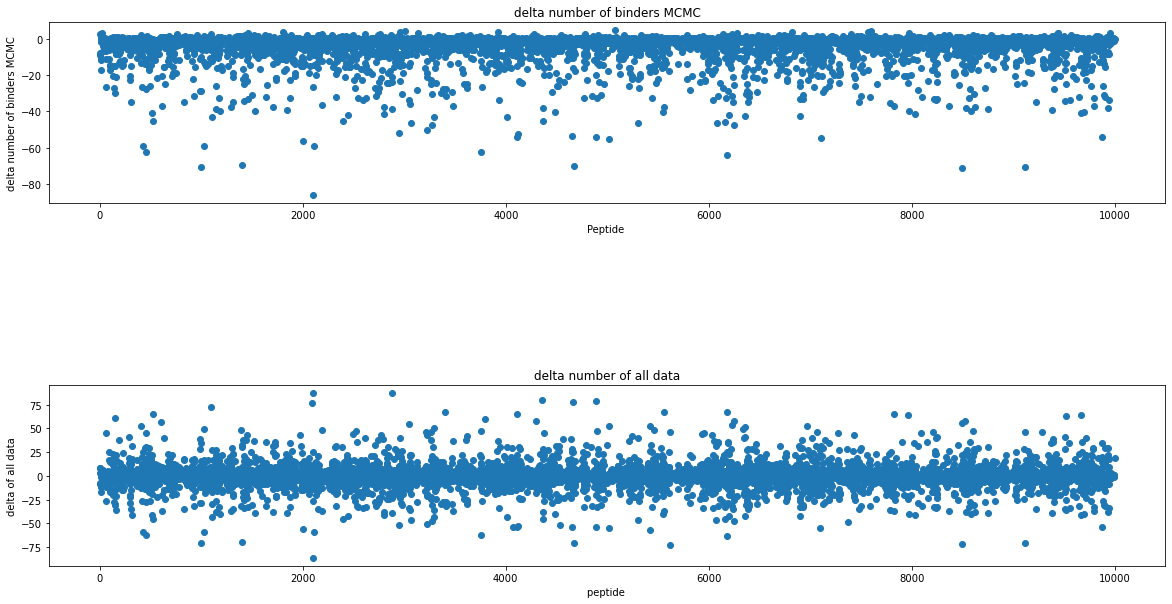

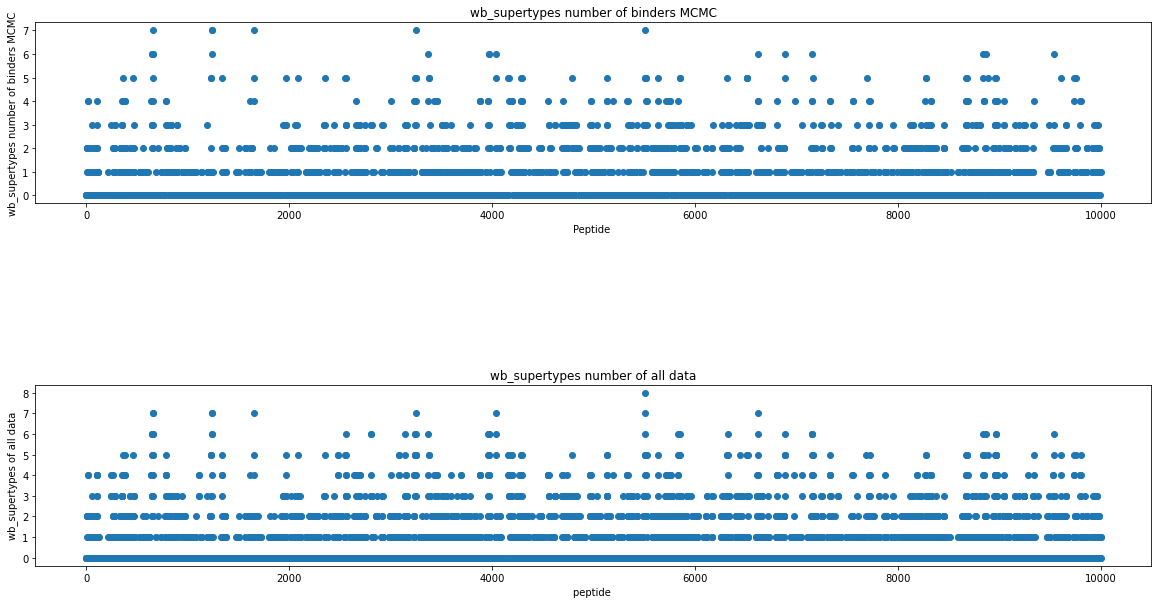

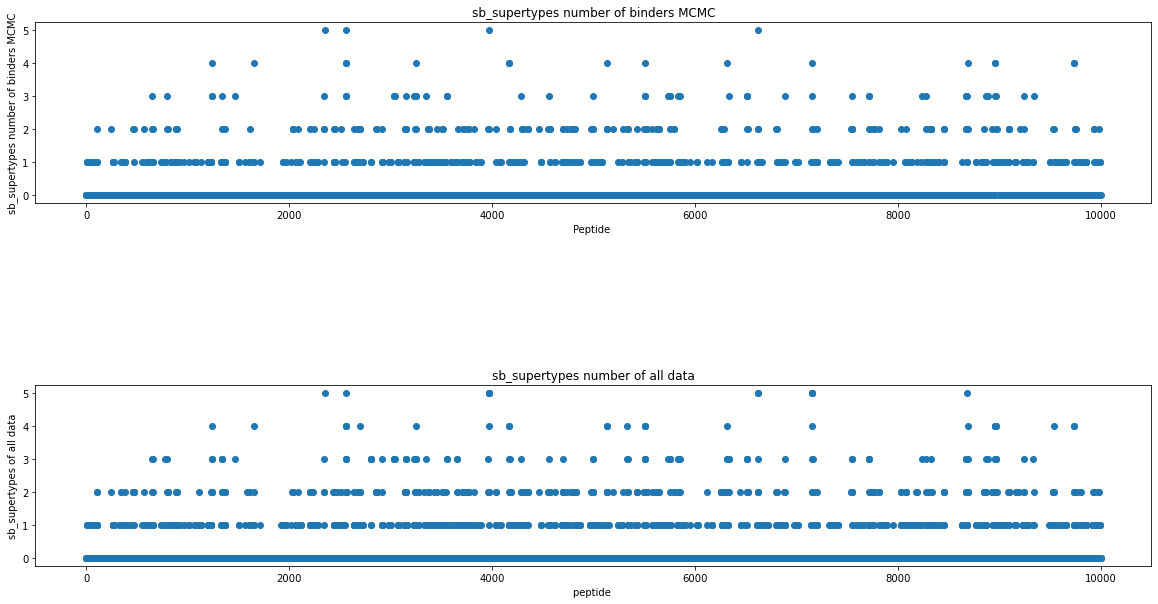

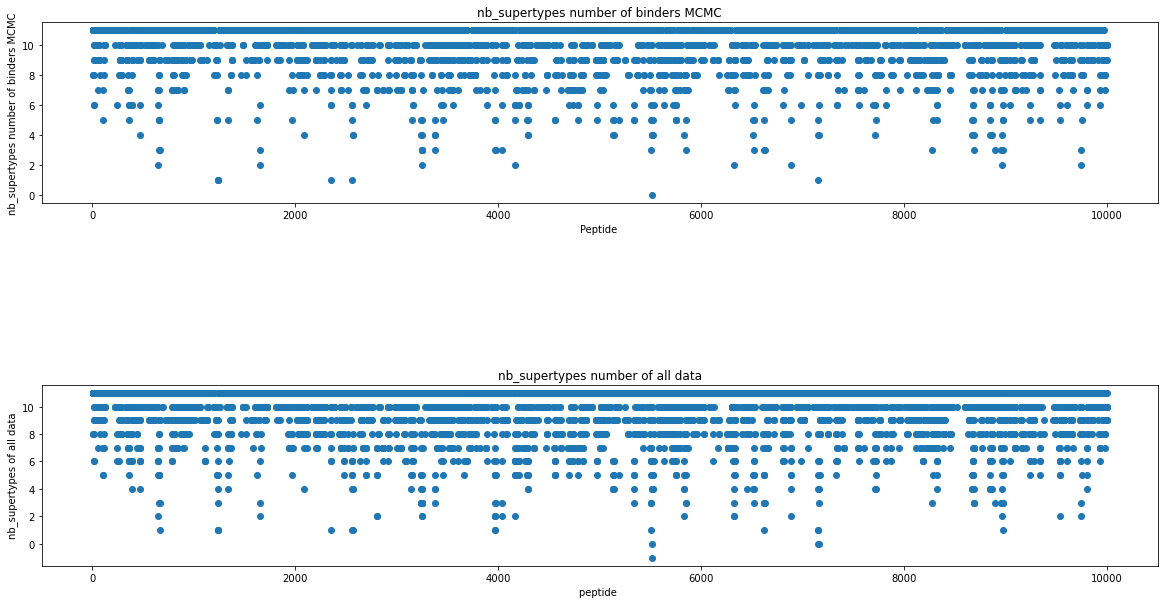

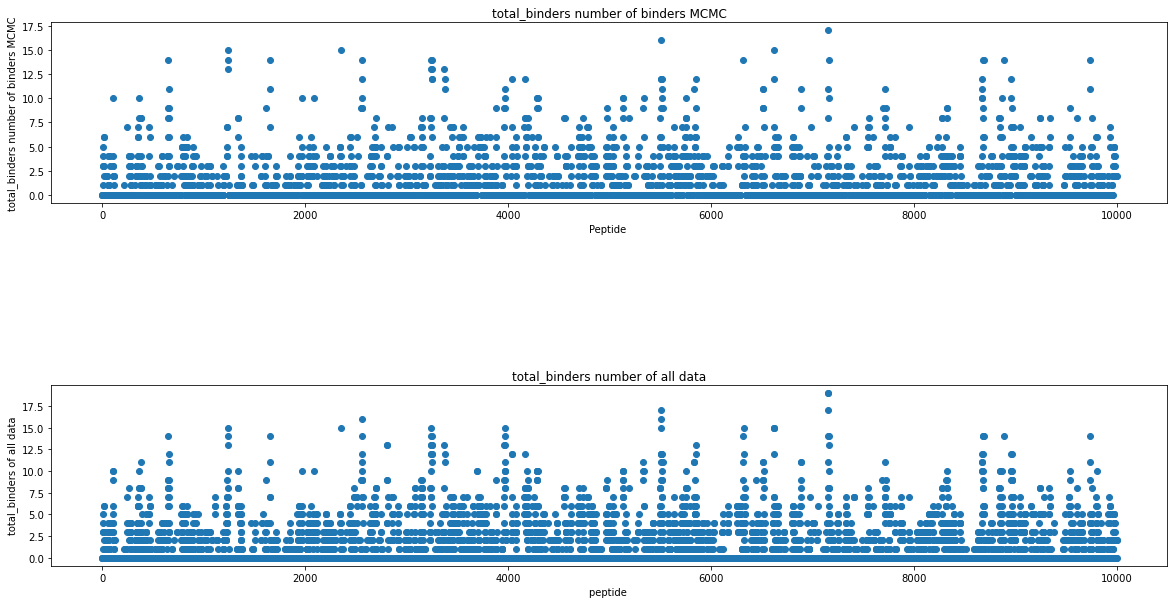

In [219]:

# first expirement calculating how the av_of_total_binders changing during MCMC
expirment_name="av_of_total_binders_expirment,seed 42"
new_path=create_folder(params["main_output_folder"],expirment_name)
print(new_path)
c=graph_for_intresting_col(df,"delta")
plt.savefig(str(new_path)+" "+expirment_name+" delta.png",dpi=100)
# c=delta_graph(df,"probabilty_res_MCMC","all_data_prob")
# total_bindes_graph(df,"total_binders")
graph_for_intresting_col(df,"wb_supertypes")
plt.savefig(str(new_path)+" "+expirment_name+" wb_supertypes.png",dpi=100)

#graph_for_intresting_col(df,"wb_supertypes")
graph_for_intresting_col(df,"sb_supertypes")
plt.savefig(str(new_path)+" "+expirment_name+" sb_supertypes.png",dpi=100)


graph_for_intresting_col(df,"nb_supertypes")
plt.savefig(str(new_path)+" "+expirment_name+" nb_supertypes.png",dpi=100)

# df["total_supertypes"]=df["sb_supertypes"]+df["wb_supertypes"]
# graph_for_intresting_col(df,"total_supertypes")


graph_for_intresting_col(df,"total_binders")
plt.savefig(str(new_path)+" "+expirment_name+" total_super_binders.png",dpi=100)
